## Dimensionality Reduction - PCA

In [ ]:
'''
-> The number of i/p features, variables or columns present in our dataset is known as dimensionality.

"It is a way of converting the higher dimensions dataset into lower dimensions dataset ensuring 
that is provides similar information"

'''

In [ ]:
'''

Steps involved in PCA:
    
*1) Standardize the datapoints - brings all the features to same scale

2) Compute the covariance matrix - 
    i) Variance :- Its is measure of dispersion or spread of data from the mean of the given dataset
    ii) Covariance :- is calculated between two variables and is used to measure how two variables 
                    vary together.

3) Compute the eigen values and eigen vectors

    i) Eigen values - magnitude
    ii) Eigen vectors - direction

4) Sort the eigen values: eigen values is high, information spread is high

*5) Select the no.of pc's (0.95) - scree plot

6) Interpret the new data


'''

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets

In [3]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

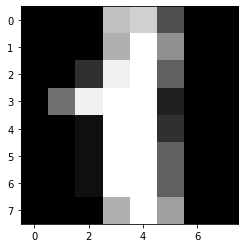

In [7]:
plt.imshow(digits.images[1], cmap = plt.cm.gray)

In [8]:
data1 = pd.DataFrame(digits.data)
data1

0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1     0.0  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2     0.0  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3     0.0  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4     0.0  0.0  0.0   2.0  16.0   4.0  0.0  0.0  
...   ...  ...  ...   ...   ...   ...  ...  ...  
1792  0.0  0.0  2.0  14.0  15.0   9.0  0.0  0.0  
1793  0.0  0.0  6.0  16.0  14.0   6.0  0.0  0.0  
1794  0.0  0.0  2.0   9.0  13.0   6.0  0.0  0.0  
1795  0.0  0.0  5.0  12.0  16.0  12.0  0.0  0.0  
1796  0.0  1.0  8.0  12.0  14.0  12.0  1.0  0.0  

[1797 rows x 64 columns]

In [9]:
digits.target[0:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
#enumerate
li = [2,3,4,5]
for i, values in enumerate(li):
    print(i, values)

0 2
1 3
2 4
3 5


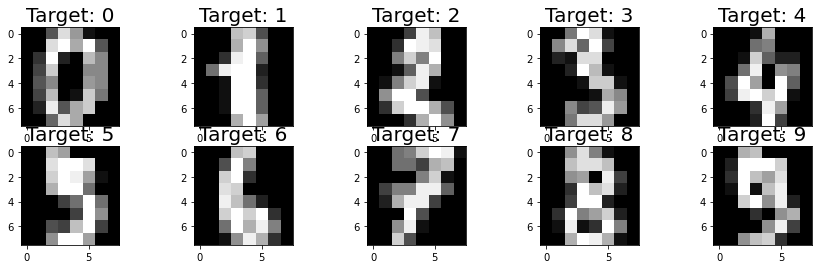

In [14]:
#
plt.figure(figsize=(15,4))
for index, (image, label) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(2,5,index+1) #(1,5,1), (1,5,2)....
    plt.imshow(np.reshape(image, (8,8)),  cmap=plt.cm.gray)
    plt.title(f"Target: {label}",fontsize=20)

In [15]:
#splitting the values of x and y
x = digits.data
y = digits.target

In [16]:
x.shape

(1797, 64)

In [18]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [19]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

In [20]:
X_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [21]:
X_std.shape

(1797, 64)

In [24]:
#transpose
x1 = X_std.T
x1.shape

(64, 1797)

In [25]:
#covariance matrix
cov_mat = np.cov(x1)
print(cov_mat.shape)

(64, 64)


In [26]:
#eigen values and eigen vectors
eig_values, eig_vecs = np.linalg.eig(cov_mat)

In [27]:
eig_values

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.27692285, 0.05037444,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [28]:
eig_vecs

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [29]:
tot = sum(eig_values)
var_exp = [(i/tot)*100 for i in eig_values] #Individual explained  variance 
var_exp

[12.033916097734911,
 9.561054403097843,
 8.444414892624566,
 6.49840790752416,
 4.860154875966413,
 4.2141198692719435,
 3.9420828035673607,
 3.3893809246383495,
 2.99822101162523,
 2.9320025512522196,
 2.781805463550328,
 2.5770550925819977,
 2.2753033157642455,
 2.2271797395143547,
 2.165229431849249,
 1.9141666064421332,
 1.7755470851681978,
 1.6380692742844287,
 1.5964601688623508,
 1.4891911870878203,
 1.3479695658179398,
 1.2719313702347577,
 1.165837350591952,
 1.0576465985363217,
 0.9753159471981117,
 0.9445589897319986,
 0.8630138269707236,
 0.836642853668514,
 0.7976932484112412,
 0.7464713709260603,
 0.7255821513702759,
 0.6919112454811802,
 0.6539085355726174,
 0.6407925738459863,
 0.5913841117223423,
 0.571162405223523,
 0.5236368034166368,
 0.4818075864451427,
 0.4537192598584497,
 0.08253509448180271,
 0.10369573015571892,
 0.4231627532327799,
 0.4060530699790384,
 0.39708480827582765,
 0.1251007424973019,
 0.13511841133708566,
 0.1477626941060875,
 0.16123606225672715,

In [30]:
#next we will find the cumulative explained variance
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  94.73728359,
        94.84097932,  95.26414208,  95.67019515,  96.06727995,
        96.1923807 ,  96.32749911,  96.4752618 ,  96.63649786,
        96.80444425,  96.98776275,  97.18327518,  97.38687281,
        97.60512967,  97.83961267,  98.19610598,  98.45528092,
        98.73177018,  99.07255736,  99.36113266,  99.68896799,
       100.        , 100.        , 100.        , 100.  

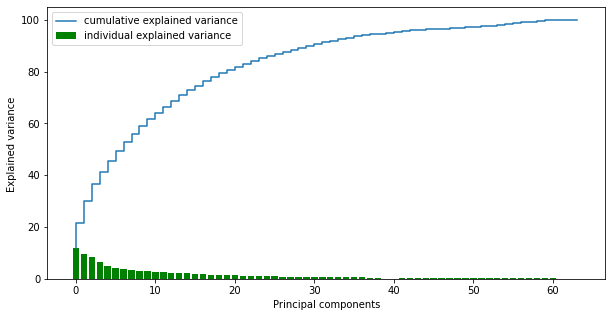

In [31]:
#scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y, train_size=0.8)

In [38]:
from sklearn.decomposition import PCA 

#pca = PCA(n_components=21)  #80%
pca = PCA(0.80)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [39]:
pca_x_train.shape

(1437, 21)

In [ ]:
#Classification model